In [2]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv('IMDB_sample.csv', index_col=False)

In [4]:
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [5]:
movies.label.sum()

3719

In [6]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


In [7]:
movies.review.str.len()

0        667
1       2982
2        669
3        691
4       1087
        ... 
7496     633
7497     650
7498     654
7499     918
7500     336
Name: review, Length: 7501, dtype: int64

In [8]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


In [9]:
# How long is the shortest review
print(min(length_reviews))

52


### Detecting the sentiment

In [10]:
#!pip install textblob

In [11]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [12]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


### Comparing the sentiment of two strings

In [13]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'

In [14]:
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

In [15]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


### What is the sentiment of a movie review?

In [16]:
titanic = [ rev for rev in movies.review.values if 'Titanic' in rev ]


In [17]:
titanic = titanic[2]

In [18]:
# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2077513227513227, subjectivity=0.5231181657848325)


### Word cloud

In [19]:
east_of_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

<function matplotlib.pyplot.show(close=None, block=None)>

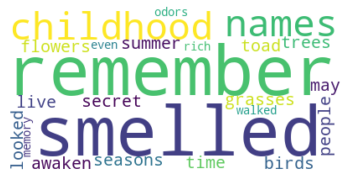

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)
# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show


In [21]:
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

<function matplotlib.pyplot.show(close=None, block=None)>

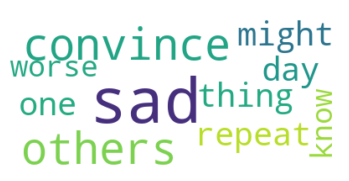

In [22]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(illuminated)
# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show

### Word Cloud on movie reviews

In [23]:
descriptions = movies[movies.label == 1]['review'][:1].values.tolist()[0]

In [24]:
len(descriptions)

669

In [25]:
my_stopwords = {'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'therefore',
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}




In [26]:
type(my_stopwords)

set

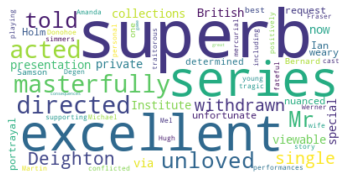

In [27]:
# Import the word cloud function 
from wordcloud import WordCloud 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()


### Numeric Features from Reviews

In [28]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


In [29]:
reviews =  pd.read_csv('amazon_reviews_sample.csv')

In [30]:
reviews.drop("Unnamed: 0",axis=1, inplace=True)

In [31]:
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [32]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


### Getting granular with n-grams

In [33]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(max_features=100, ngram_range=(1, 2))
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  an  and  and the  are  as  at  be  ...  were  what  \
0      0      0    1   0    2        0    0   0   0   0  ...     0     0   
1      0      0    0   0    3        0    1   0   0   1  ...     0     0   
2      0      0    3   1    4        1    1   1   0   1  ...     0     0   
3      0      0    0   0    9        0    1   0   0   1  ...     0     0   
4      0      1    0   0    3        1    1   0   0   1  ...     0     0   

   when  which  who  will  with  would  you  your  
0     0      0    2     0     1      2    0     1  
1     0      0    0     0     0      1    1     0  
2     0      1    1     0     0      1    2     0  
3     0      0    0     0     0      0    0     0  
4     0      0    0     0     0      0    3     1  

[5 rows x 100 columns]


In [34]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   about      10000 non-null  int64
 1   after      10000 non-null  int64
 2   all        10000 non-null  int64
 3   an         10000 non-null  int64
 4   and        10000 non-null  int64
 5   and the    10000 non-null  int64
 6   are        10000 non-null  int64
 7   as         10000 non-null  int64
 8   at         10000 non-null  int64
 9   be         10000 non-null  int64
 10  because    10000 non-null  int64
 11  been       10000 non-null  int64
 12  best       10000 non-null  int64
 13  better     10000 non-null  int64
 14  book       10000 non-null  int64
 15  but        10000 non-null  int64
 16  buy        10000 non-null  int64
 17  by         10000 non-null  int64
 18  can        10000 non-null  int64
 19  do         10000 non-null  int64
 20  don        10000 non-null  int64
 21  even       1

### Size of vocabulary of movies reviews

In [35]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


In [36]:
# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


In [37]:
# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


In [38]:
#Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

### Build new features from text

In [39]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [40]:
# Import the required function
from nltk import word_tokenize

# Transform the GoT string to word tokens
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [41]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

In [42]:
# Import the word tokenizing function
from nltk import word_tokenize

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


### A feature for the length of a review

In [43]:
# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [44]:
# Iterate over the word_tokens list and determine the length of each item
len_tokens = [len(word_tokens[i]) for i in range(len(word_tokens))]

reviews['n_words'] = len_tokens

In [45]:
reviews

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


### Identify the language of a string

In [46]:
#!pip install langdetect

In [47]:
foreign = "L'histoire rendu était fidèle, excellent, et grande."

In [48]:
# Import the language detection function and package
from langdetect import detect_langs 

# Detect the language of the foreign string
print(detect_langs(foreign))

[fr:0.9999964575820217]


In [49]:
sentences = ["L'histoire rendu était fidèle, excellent, et grande.",
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']

In [50]:
languages = []

# Loop over the sentences in the list and detect their language
for sentence in sentences:
    languages.append(detect_langs(sentence))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.999995301964101], [es:0.8571387123138575, pt:0.14285902486615185], [en:0.9999960983199218]]


### Language detection of product reviews 

In [51]:
languages = []

# Loop over the rows of the dataset and append  
for row in range(len(reviews)):
    languages.append(detect_langs(reviews.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
reviews['language'] = languages

print(reviews.head())

   score                                             review  n_words language
0      1   Stuning even for the non-gamer: This sound tr...       87       en
1      1   The best soundtrack ever to anything.: I'm re...      109       en
2      1   Amazing!: This soundtrack is my favorite musi...      165       en
3      1   Excellent Soundtrack: I truly like this sound...      145       en
4      1   Remember, Pull Your Jaw Off The Floor After H...      109       en


In [52]:
reviews[reviews['language'] != 'en']

,score,review,n_words,language
169,1,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...,34,de
881,1,Good read................. ............... .....,38,cy
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,171,it
1259,1,La reencarnación vista por un científico: El ...,37,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50,es
1639,1,El libro mas completo que existe para nosotra...,40,es
1745,1,Excelente!: Una excelente guía para todos aqu...,56,es
2316,1,Nightwish is unique and rocks for eva: Moi to...,54,fr
2486,1,Palabras de aliento para tu caminar con Dios:...,86,es
2760,0,Completement nul: Fait sur commande et ennuya...,23,fr


### Stop words

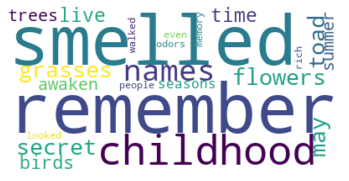

In [53]:
# Import the word cloud function 
from wordcloud import WordCloud, STOPWORDS 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(east_of_eden)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

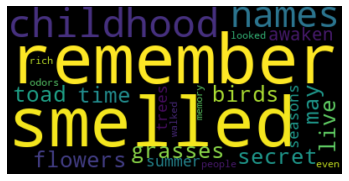

In [54]:
# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(east_of_eden)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

In [55]:
tweets = pd.read_csv('Tweets.csv')

In [56]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [57]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [58]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multiple text columns

In [59]:
tweets_mult = tweets[['airline_sentiment', 'text', 'negativereason']].dropna()

In [60]:
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets_mult.text)
vect2.fit(tweets_mult.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print('='*100)
print(vect2.get_feature_names_out())

['zira2z3udc' 'zkatcher' 'zkoe6clgiu' 'zl4bvexmcj' 'zombie' 'zone' 'zones'
 'zoom' 'zouowgv3q6' 'zrh' 'zukes' 'zurich' 'zv6cfpohl5' 'zvfmxnuelj'
 'zzps5ywve2']
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'problems' 'service'
 'tell']


### Capturing a token pattern

In [61]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


In [62]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


### String operators with the Twitter data

In [63]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [64]:
print('Original tokens: ', word_tokens[100])
print('='*100)
print('Cleaned tokens: ', cleaned_tokens[100])

Original tokens:  ['@', 'VirginAmerica', 'trying', 'to', 'add', 'my', 'boy', 'Prince', 'to', 'my', 'ressie', '.', 'SF', 'this', 'Thursday', '@', 'VirginAmerica', 'from', 'LAX', 'http', ':', '//t.co/GsB2J3c4gM']
Cleaned tokens:  ['VirginAmerica', 'trying', 'to', 'add', 'my', 'boy', 'Prince', 'to', 'my', 'ressie', 'SF', 'this', 'Thursday', 'VirginAmerica', 'from', 'LAX', 'http']


In [65]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

In [66]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('='*100)
print('Last item in list of alphanumerics: ', let_digits[2])
print('='*100)
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


### Stemming and lemmatization

In [67]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [68]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

In [69]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [70]:
# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  3.039062976837158
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


### Stem Spanish reviews

In [71]:
filtered_reviews = reviews[reviews['language'] == 'es']

In [72]:
filtered_reviews

,score,review,n_words,language
1259,1,La reencarnación vista por un científico: El ...,37,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50,es
1639,1,El libro mas completo que existe para nosotra...,40,es
1745,1,Excelente!: Una excelente guía para todos aqu...,56,es
2486,1,Palabras de aliento para tu caminar con Dios:...,86,es
2903,1,fabuloso: mil gracias por el producto fabulos...,23,es
3318,1,Excelentes botas.. excelentes boots: Excelent...,41,es
3694,0,Why not Spanish ???: Alguien me puede decir p...,112,es
4820,1,"La mejor película de Moore: A mi juicio, esta...",24,es
5901,1,"Buen cargador: Product very good, I am of Ven...",28,es


In [73]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(filtered_reviews.review[1259])
print(stemmed_tokens[0])

 La reencarnación vista por un científico: El primer libro del Dr. Weiss sigue siendo un gran libro para todos aquellos a quienes les inquieta el tema de la reencarnación, así no crean en ella.

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


### Stems from tweets

In [74]:
tweets = tweets.text

In [75]:
# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(word) for word in tweets]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


### TfIdf: More ways to transform text

In [76]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


In [77]:
# Create the bow representation
X_df = pd.DataFrame(anna_tfidf.toarray(), columns=anna_vect.get_feature_names_out())
print(X_df.head())

      alike       all       are     every  families    family     happy  \
0  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
1  0.000000  0.000000  0.000000  0.301511  0.000000  0.301511  0.000000   

         in        is       its       own   unhappy       way  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.301511  0.301511  0.301511  0.301511  0.603023  0.301511  


In [78]:
tweets = pd.read_csv('Tweets.csv')

In [79]:
# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.fit_transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
print(X.head())

    aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst  yes  
0   0.0    0.0  0.0  


### Tfidf and a BOW on same data

In [80]:
 # Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review) 

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000

### Predict the Sentiment

In [81]:
reviews.head()

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


In [82]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   score     10000 non-null  int64 
 1   review    10000 non-null  object
 2   n_words   10000 non-null  int64 
 3   language  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


### Logistic regression of movie reviews

In [83]:
movies = pd.read_csv('IMDB_sample.csv')

In [84]:
movies

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
...,...,...,...
7496,7334,Although this film is somewhat filled with eig...,1
7497,11638,Bo Derek's beauty and John Derek's revolutiona...,1
7498,19851,I have seen every episode of this spin off. I ...,0
7499,8114,"A comedy gem. Lots of laugh out loud moments, ...",1


In [85]:
movies.drop("Unnamed: 0",axis=1, inplace=True)

In [86]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = movies.label
X = movies.review

count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression(solver='liblinear').fit(count_train, y)
print('Accuracy of logistic regression: ', log_reg.score(count_train, y))

Accuracy of logistic regression:  0.9994667377682975


### Logistic regression using Twitter data

In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [90]:
X = tweets.text

In [91]:
X.isnull().sum()

0

In [92]:
y = le.fit_transform(tweets.airline_sentiment)

In [93]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [94]:
# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.text

vect = TfidfVectorizer(ngram_range=(1, 2), 
                       token_pattern=my_pattern)
X_vect = vect.fit_transform(X)




# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression(solver='liblinear').fit(X_vect, y)
print('Accuracy of logistic regression: ', log_reg.score(X_vect,y))

# Create an array of prediction
y_predict = log_reg.predict(X_vect)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.8583333333333333
Accuracy of logistic regression:  0.8583333333333333


### Build and assess a model: movies reviews

In [95]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies.label
X = count_train

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.9996666666666667
Accuracy on test set:  0.8334443704197202


### Performance metrics of Twitter data

In [96]:
# Split the data into training and testing sets
y = tweets.airline_sentiment
X = X_vect 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7577413479052824
Confusion matrix test set: 
 [[0.61338798 0.00933515 0.00409836]
 [0.1318306  0.07240437 0.00751366]
 [0.07650273 0.01297814 0.071949  ]]


### Build and assess a model: product reviews data

In [97]:
reviews.head()

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


In [98]:
y = reviews.score
X = count_vectorizer.fit_transform(reviews.review)

In [99]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression(solver='liblinear').fit(X_train,y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.8613333333333333
Confusion matrix of test data: 
 [[0.43966667 0.06633333]
 [0.07233333 0.42166667]]


### Predict probabilities of movie reviews

In [100]:
y = movies.label
X = count_train

In [101]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print()
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [9.96433362e-01 9.23629199e-01 8.55661767e-02 3.34336666e-04
 9.73846228e-01 9.22567314e-01 8.84627435e-02 9.76710645e-01
 4.62033689e-01 7.98972665e-03]

First 10 predicted probabilities of class 1:  [0.00356664 0.0763708  0.91443382 0.99966566 0.02615377 0.07743269
 0.91153726 0.02328935 0.53796631 0.99201027]


### Product reviews with regularization 

In [102]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(solver='liblinear', C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(solver='liblinear', C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.8307794803464357
Accuracy of model 2:  0.8001332445036642


### Regularizing models with Twitter data

In [103]:
y = tweets.airline_sentiment
X = X_vect
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [104]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(solver='liblinear', C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(solver='liblinear', C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.8203551912568307
Accuracy of model 2:  0.6584699453551912
Confusion matrix of model 1: 
 [[0.59153005 0.02561475 0.01092896]
 [0.0864071  0.12397541 0.00751366]
 [0.03346995 0.01571038 0.10484973]]
Confusion matrix of model 2: 
 [[0.62636612 0.00102459 0.00068306]
 [0.20628415 0.00956284 0.00204918]
 [0.13046448 0.00102459 0.02254098]]


### Bringing it all together

#### Step 1: Word cloud and feature creation

In [105]:
reviews = reviews[['score', 'review']]

In [106]:
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [107]:
positive_reviews = reviews[reviews['score'] == 1]['review']

In [108]:
positive_reviews

0        Stuning even for the non-gamer: This sound tr...
1        The best soundtrack ever to anything.: I'm re...
2        Amazing!: This soundtrack is my favorite musi...
3        Excellent Soundtrack: I truly like this sound...
4        Remember, Pull Your Jaw Off The Floor After H...
                              ...                        
9990     Psychological thriller!: This movie really sc...
9991     A little more money than what I expected to s...
9995     A revelation of life in small town America in...
9996     Great biography of a very interesting journal...
9999     Beautiful Pen and Fast Delivery.: The pen was...
Name: review, Length: 4903, dtype: object

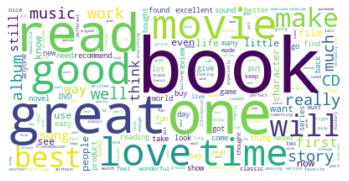

In [109]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(','.join(positive_reviews))
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [110]:
negative_reviews = reviews[reviews['score'] == 0]['review']

In [111]:
negative_reviews

6        Buyer beware: This is a self-published book, ...
10       The Worst!: A complete waste of time. Typogra...
13       Oh please: I guess you have to be a romance n...
14       Awful beyond belief!: I feel I have to write ...
15       Don't try to fool us with fake reviews.: It's...
                              ...                        
9992     "The Silence of the Dummies": This is overall...
9993     Mauled again - killing bears to enrich himsel...
9994     Sorry Jim: As a former realtor, Mr. Cole owes...
9997     Interesting Subject; Poor Presentation: You'd...
9998     Don't buy: The box looked used and it is obvi...
Name: review, Length: 5097, dtype: object

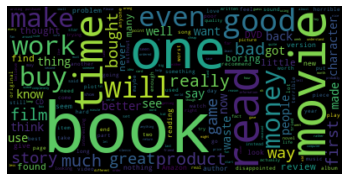

In [112]:
# Create and generate a word cloud image
cloud_negative = WordCloud(background_color='black').generate(','.join(negative_reviews))
 
# Display the generated wordcloud image
plt.imshow(cloud_negative, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [113]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

<ipython-input-113-3b00b65553c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['n_words'] = len_tokens


In [114]:
reviews

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


#### Step 2: Building a vectorizer

In [115]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

### Step 3: Building a classifier

In [116]:
X.shape, y.shape

((10000, 200), (14640,))

In [120]:
# Define X and y
y = reviews.score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
